# 2. Create Dataset for Clustering

## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random

## Import Data

In [2]:
df = pd.read_csv('/Users/cenkyagkan/Desktop/OMM/7.Semester/Applied Data Analytics/Clustering/Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Create custom dataset

In [4]:
df['Einkommen'] = df['Annual Income (k$)']*1000
df = df.drop(['Annual Income (k$)', 'Spending Score (1-100)', 'CustomerID'], axis = 1)

In [5]:
df

,Gender,Age,Einkommen
0,Male,19,15000
1,Male,21,15000
2,Female,20,16000
3,Female,23,16000
4,Female,31,17000
...,...,...,...
195,Female,35,120000
196,Female,45,126000
197,Male,32,126000
198,Male,32,137000


In [6]:
def rate(x):
    if x["Einkommen"] < 15001:
        return random.randint(380,440)
    elif x["Einkommen"] > 15001 and x["Einkommen"] < 25000:
        return random.randint(440,500)
    elif x["Einkommen"] >= 25000 and x["Einkommen"] < 50000:
        return random.randint(500,650)
    elif x["Einkommen"] > 50000 and x["Einkommen"] < 75000:
        return random.randint(650, 800)
    elif x["Einkommen"] > 75000 and x["Einkommen"] < 90000:
        return random.randint(800,950)
    elif x["Einkommen"] > 90000 and x["Einkommen"] < 120000:
        return random.randint(1000, 1300)
    elif x["Einkommen"] >= 120000:
        return random.randint(1300, 1800)
    

In [7]:
df["Leasingrate"] = df.apply(lambda x: rate(x), axis=1)

In [8]:
df.head(20)

,Gender,Age,Einkommen,Leasingrate
0,Male,19,15000,423.0
1,Male,21,15000,420.0
2,Female,20,16000,474.0
3,Female,23,16000,449.0
4,Female,31,17000,451.0
5,Female,22,17000,486.0
6,Female,35,18000,443.0
7,Female,23,18000,449.0
8,Male,64,19000,477.0
9,Female,30,19000,499.0


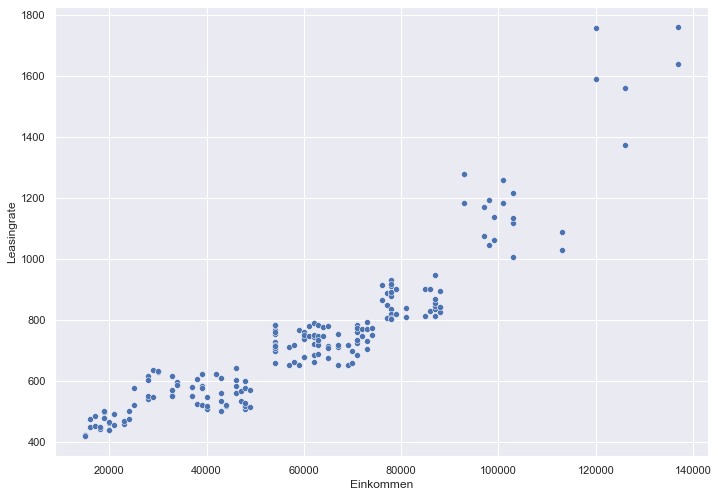

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=df, x="Einkommen", y="Leasingrate");

In [10]:
df.to_csv(r'/Users/cenkyagkan/Desktop/OMM/7.Semester/Applied Data Analytics/Clustering/final_dataset_cluster.csv', index = False)